In [118]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset

In [101]:
ds= pd.read_csv('./heart_failure_clinical_records_dataset.csv')
ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Delete NA

In [102]:
ds[ds.notnull()]
ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Classification

In [42]:
#age

In [103]:
def age_clasif(age):
    if age >= 40 and age < 65:
        return('Old-adult')
    elif age >= 65 and age < 75:
        return('Youngest-old')
    elif age >= 75 and age < 85:
        return('middle-old')
    elif age>= 85:
        return('oldest-old')
    else:
        return('Unclassified')

ds['age'] = ds['age'].apply(age_clasif)
ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,middle-old,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,Old-adult,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,Youngest-old,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,Old-adult,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,Youngest-old,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Old-adult,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,Old-adult,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,Old-adult,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,Old-adult,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [44]:
#Ejection Fraction

In [104]:
def ejection_fraction_clasif(ejection_fraction):
    if ejection_fraction <= 40:
        return('Reduced EF')
    elif ejection_fraction >= 41 and ejection_fraction <= 49:
        return('Borderline EF')
    elif ejection_fraction >= 50 and ejection_fraction <= 80:
        return('Normal EF')
    else:
        return('Unclassified')

ds['ejection_fraction'] = ds['ejection_fraction'].apply(ejection_fraction_clasif)
ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,middle-old,0,582,0,Reduced EF,1,265000.00,1.9,130,1,0,4,1
1,Old-adult,0,7861,0,Reduced EF,0,263358.03,1.1,136,1,0,6,1
2,Youngest-old,0,146,0,Reduced EF,0,162000.00,1.3,129,1,1,7,1
3,Old-adult,1,111,0,Reduced EF,0,210000.00,1.9,137,1,0,7,1
4,Youngest-old,1,160,1,Reduced EF,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Old-adult,0,61,1,Reduced EF,1,155000.00,1.1,143,1,1,270,0
295,Old-adult,0,1820,0,Reduced EF,0,270000.00,1.2,139,0,0,271,0
296,Old-adult,0,2060,1,Normal EF,0,742000.00,0.8,138,0,0,278,0
297,Old-adult,0,2413,0,Reduced EF,0,140000.00,1.4,140,1,1,280,0


In [54]:
#Platlets

In [105]:
def platelets_clasif(platelets):
    if platelets <= 100000:
        return('moderateF')
    elif platelets > 100000 and platelets <= 450000:
        return('Normal')
    elif platelets > 450000 :
        return('High')
    else:
        return('Unclassified')

ds['platelets'] = ds['platelets'].apply(platelets_clasif)
ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,middle-old,0,582,0,Reduced EF,1,Normal,1.9,130,1,0,4,1
1,Old-adult,0,7861,0,Reduced EF,0,Normal,1.1,136,1,0,6,1
2,Youngest-old,0,146,0,Reduced EF,0,Normal,1.3,129,1,1,7,1
3,Old-adult,1,111,0,Reduced EF,0,Normal,1.9,137,1,0,7,1
4,Youngest-old,1,160,1,Reduced EF,0,Normal,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Old-adult,0,61,1,Reduced EF,1,Normal,1.1,143,1,1,270,0
295,Old-adult,0,1820,0,Reduced EF,0,Normal,1.2,139,0,0,271,0
296,Old-adult,0,2060,1,Normal EF,0,High,0.8,138,0,0,278,0
297,Old-adult,0,2413,0,Reduced EF,0,Normal,1.4,140,1,1,280,0


In [56]:
#Creatine Phosphokinase

In [106]:
def creatinine_phosphokinase_clasif(creatinine_phosphokinase):
    if creatinine_phosphokinase >= 20 and creatinine_phosphokinase <= 200:
        return('Good normal')
    elif creatinine_phosphokinase > 200 and creatinine_phosphokinase <= 1200:
        return('Generally normal')
    elif creatinine_phosphokinase > 1200:
        return('Indicative of rhabdomyolysis')
    else:
        return('Unclassified')

ds['creatinine_phosphokinase'] = ds['creatinine_phosphokinase'].apply(creatinine_phosphokinase_clasif)
ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,middle-old,0,Generally normal,0,Reduced EF,1,Normal,1.9,130,1,0,4,1
1,Old-adult,0,Indicative of rhabdomyolysis,0,Reduced EF,0,Normal,1.1,136,1,0,6,1
2,Youngest-old,0,Good normal,0,Reduced EF,0,Normal,1.3,129,1,1,7,1
3,Old-adult,1,Good normal,0,Reduced EF,0,Normal,1.9,137,1,0,7,1
4,Youngest-old,1,Good normal,1,Reduced EF,0,Normal,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Old-adult,0,Good normal,1,Reduced EF,1,Normal,1.1,143,1,1,270,0
295,Old-adult,0,Indicative of rhabdomyolysis,0,Reduced EF,0,Normal,1.2,139,0,0,271,0
296,Old-adult,0,Indicative of rhabdomyolysis,1,Normal EF,0,High,0.8,138,0,0,278,0
297,Old-adult,0,Indicative of rhabdomyolysis,0,Reduced EF,0,Normal,1.4,140,1,1,280,0


In [58]:
#Serum sodium

In [107]:
def serum_sodium_clasif(serum_sodium):
    if serum_sodium >= 130 and serum_sodium <= 135:
        return('mild')
    elif serum_sodium >= 120 and serum_sodium <= 129:
        return('moderate')
    elif serum_sodium < 120:
        return('severe')
    else:
        return('Uncategorized')

ds['serum_sodium'] = ds['serum_sodium'].apply(serum_sodium_clasif)
ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,middle-old,0,Generally normal,0,Reduced EF,1,Normal,1.9,mild,1,0,4,1
1,Old-adult,0,Indicative of rhabdomyolysis,0,Reduced EF,0,Normal,1.1,Uncategorized,1,0,6,1
2,Youngest-old,0,Good normal,0,Reduced EF,0,Normal,1.3,moderate,1,1,7,1
3,Old-adult,1,Good normal,0,Reduced EF,0,Normal,1.9,Uncategorized,1,0,7,1
4,Youngest-old,1,Good normal,1,Reduced EF,0,Normal,2.7,severe,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Old-adult,0,Good normal,1,Reduced EF,1,Normal,1.1,Uncategorized,1,1,270,0
295,Old-adult,0,Indicative of rhabdomyolysis,0,Reduced EF,0,Normal,1.2,Uncategorized,0,0,271,0
296,Old-adult,0,Indicative of rhabdomyolysis,1,Normal EF,0,High,0.8,Uncategorized,0,0,278,0
297,Old-adult,0,Indicative of rhabdomyolysis,0,Reduced EF,0,Normal,1.4,Uncategorized,1,1,280,0


In [60]:
# Serum creatinine

In [108]:
def serum_creatinine_clasif(serum_creatinine):
    if serum_creatinine >= 2.75:
        return('high')
    elif serum_creatinine < 2.75:
        return('Intermediate or low')
    else:
        return('Unclassified')

ds['serum_creatinine'] = ds['serum_creatinine'].apply(serum_creatinine_clasif)
ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,middle-old,0,Generally normal,0,Reduced EF,1,Normal,Intermediate or low,mild,1,0,4,1
1,Old-adult,0,Indicative of rhabdomyolysis,0,Reduced EF,0,Normal,Intermediate or low,Uncategorized,1,0,6,1
2,Youngest-old,0,Good normal,0,Reduced EF,0,Normal,Intermediate or low,moderate,1,1,7,1
3,Old-adult,1,Good normal,0,Reduced EF,0,Normal,Intermediate or low,Uncategorized,1,0,7,1
4,Youngest-old,1,Good normal,1,Reduced EF,0,Normal,Intermediate or low,severe,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Old-adult,0,Good normal,1,Reduced EF,1,Normal,Intermediate or low,Uncategorized,1,1,270,0
295,Old-adult,0,Indicative of rhabdomyolysis,0,Reduced EF,0,Normal,Intermediate or low,Uncategorized,0,0,271,0
296,Old-adult,0,Indicative of rhabdomyolysis,1,Normal EF,0,High,Intermediate or low,Uncategorized,0,0,278,0
297,Old-adult,0,Indicative of rhabdomyolysis,0,Reduced EF,0,Normal,Intermediate or low,Uncategorized,1,1,280,0


In [23]:
# Anaemia

In [109]:
def anaemia_clasif(anaemia):
    if anaemia == 0:
        return('N')
    elif anaemia == 1:
        return('P')
    else:
        return('Unclassified')

ds['anaemia'] = ds['anaemia'].apply(anaemia_clasif)
ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,middle-old,N,Generally normal,0,Reduced EF,1,Normal,Intermediate or low,mild,1,0,4,1
1,Old-adult,N,Indicative of rhabdomyolysis,0,Reduced EF,0,Normal,Intermediate or low,Uncategorized,1,0,6,1
2,Youngest-old,N,Good normal,0,Reduced EF,0,Normal,Intermediate or low,moderate,1,1,7,1
3,Old-adult,P,Good normal,0,Reduced EF,0,Normal,Intermediate or low,Uncategorized,1,0,7,1
4,Youngest-old,P,Good normal,1,Reduced EF,0,Normal,Intermediate or low,severe,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Old-adult,N,Good normal,1,Reduced EF,1,Normal,Intermediate or low,Uncategorized,1,1,270,0
295,Old-adult,N,Indicative of rhabdomyolysis,0,Reduced EF,0,Normal,Intermediate or low,Uncategorized,0,0,271,0
296,Old-adult,N,Indicative of rhabdomyolysis,1,Normal EF,0,High,Intermediate or low,Uncategorized,0,0,278,0
297,Old-adult,N,Indicative of rhabdomyolysis,0,Reduced EF,0,Normal,Intermediate or low,Uncategorized,1,1,280,0


In [24]:
# Diabetes

In [110]:
def diabetes_clasif(diabetes):
    if diabetes == 0:
        return('N')
    elif diabetes == 1:
        return('P')
    else:
        return('Unclassified')

ds['diabetes'] = ds['diabetes'].apply(diabetes_clasif)
ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,middle-old,N,Generally normal,N,Reduced EF,1,Normal,Intermediate or low,mild,1,0,4,1
1,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,0,Normal,Intermediate or low,Uncategorized,1,0,6,1
2,Youngest-old,N,Good normal,N,Reduced EF,0,Normal,Intermediate or low,moderate,1,1,7,1
3,Old-adult,P,Good normal,N,Reduced EF,0,Normal,Intermediate or low,Uncategorized,1,0,7,1
4,Youngest-old,P,Good normal,P,Reduced EF,0,Normal,Intermediate or low,severe,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Old-adult,N,Good normal,P,Reduced EF,1,Normal,Intermediate or low,Uncategorized,1,1,270,0
295,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,0,Normal,Intermediate or low,Uncategorized,0,0,271,0
296,Old-adult,N,Indicative of rhabdomyolysis,P,Normal EF,0,High,Intermediate or low,Uncategorized,0,0,278,0
297,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,0,Normal,Intermediate or low,Uncategorized,1,1,280,0


In [ ]:
# Gender

In [111]:
def gender_clasif(sex):
    if sex == 0:
        return('Female')
    elif sex == 1:
        return('Male')
    else:
        return('Unclassified')

ds['sex'] = ds['sex'].apply(gender_clasif)
ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,middle-old,N,Generally normal,N,Reduced EF,1,Normal,Intermediate or low,mild,Male,0,4,1
1,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,0,Normal,Intermediate or low,Uncategorized,Male,0,6,1
2,Youngest-old,N,Good normal,N,Reduced EF,0,Normal,Intermediate or low,moderate,Male,1,7,1
3,Old-adult,P,Good normal,N,Reduced EF,0,Normal,Intermediate or low,Uncategorized,Male,0,7,1
4,Youngest-old,P,Good normal,P,Reduced EF,0,Normal,Intermediate or low,severe,Female,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Old-adult,N,Good normal,P,Reduced EF,1,Normal,Intermediate or low,Uncategorized,Male,1,270,0
295,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,0,Normal,Intermediate or low,Uncategorized,Female,0,271,0
296,Old-adult,N,Indicative of rhabdomyolysis,P,Normal EF,0,High,Intermediate or low,Uncategorized,Female,0,278,0
297,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,0,Normal,Intermediate or low,Uncategorized,Male,1,280,0


In [28]:
# High blood pressure hbp

In [112]:
def hbp_clasif(high_blood_pressure):
    if high_blood_pressure == 0:
        return('No')
    elif high_blood_pressure == 1:
        return('Yes')
    else:
        return('Unclassified')

ds['high_blood_pressure'] = ds['high_blood_pressure'].apply(hbp_clasif)
ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,middle-old,N,Generally normal,N,Reduced EF,Yes,Normal,Intermediate or low,mild,Male,0,4,1
1,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Male,0,6,1
2,Youngest-old,N,Good normal,N,Reduced EF,No,Normal,Intermediate or low,moderate,Male,1,7,1
3,Old-adult,P,Good normal,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Male,0,7,1
4,Youngest-old,P,Good normal,P,Reduced EF,No,Normal,Intermediate or low,severe,Female,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Old-adult,N,Good normal,P,Reduced EF,Yes,Normal,Intermediate or low,Uncategorized,Male,1,270,0
295,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Female,0,271,0
296,Old-adult,N,Indicative of rhabdomyolysis,P,Normal EF,No,High,Intermediate or low,Uncategorized,Female,0,278,0
297,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Male,1,280,0


In [31]:
# Smoking

In [113]:
def is_smoking(smoking):
    if smoking == 0:
        return('No')
    elif smoking == 1:
        return('Yes')
    else:
        return('Unclassified')

ds['smoking'] = ds['smoking'].apply(is_smoking)
ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,middle-old,N,Generally normal,N,Reduced EF,Yes,Normal,Intermediate or low,mild,Male,No,4,1
1,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Male,No,6,1
2,Youngest-old,N,Good normal,N,Reduced EF,No,Normal,Intermediate or low,moderate,Male,Yes,7,1
3,Old-adult,P,Good normal,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Male,No,7,1
4,Youngest-old,P,Good normal,P,Reduced EF,No,Normal,Intermediate or low,severe,Female,No,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Old-adult,N,Good normal,P,Reduced EF,Yes,Normal,Intermediate or low,Uncategorized,Male,Yes,270,0
295,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Female,No,271,0
296,Old-adult,N,Indicative of rhabdomyolysis,P,Normal EF,No,High,Intermediate or low,Uncategorized,Female,No,278,0
297,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Male,Yes,280,0


In [ ]:
# Time per month

In [114]:
def time_month(time):
    return(int(time / 12) + 1)

ds['time'] = ds['time'].apply(time_month)
ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,middle-old,N,Generally normal,N,Reduced EF,Yes,Normal,Intermediate or low,mild,Male,No,1,1
1,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Male,No,1,1
2,Youngest-old,N,Good normal,N,Reduced EF,No,Normal,Intermediate or low,moderate,Male,Yes,1,1
3,Old-adult,P,Good normal,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Male,No,1,1
4,Youngest-old,P,Good normal,P,Reduced EF,No,Normal,Intermediate or low,severe,Female,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Old-adult,N,Good normal,P,Reduced EF,Yes,Normal,Intermediate or low,Uncategorized,Male,Yes,23,0
295,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Female,No,23,0
296,Old-adult,N,Indicative of rhabdomyolysis,P,Normal EF,No,High,Intermediate or low,Uncategorized,Female,No,24,0
297,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Male,Yes,24,0


In [ ]:
# Death

In [115]:
def is_dead(DEATH_EVENT):
    if DEATH_EVENT == 0:
        return('alive')
    elif DEATH_EVENT == 1:
        return('dead')
    else:
        return('Unclassified')

ds['DEATH_EVENT'] = ds['DEATH_EVENT'].apply(is_dead)
ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,middle-old,N,Generally normal,N,Reduced EF,Yes,Normal,Intermediate or low,mild,Male,No,1,dead
1,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Male,No,1,dead
2,Youngest-old,N,Good normal,N,Reduced EF,No,Normal,Intermediate or low,moderate,Male,Yes,1,dead
3,Old-adult,P,Good normal,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Male,No,1,dead
4,Youngest-old,P,Good normal,P,Reduced EF,No,Normal,Intermediate or low,severe,Female,No,1,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Old-adult,N,Good normal,P,Reduced EF,Yes,Normal,Intermediate or low,Uncategorized,Male,Yes,23,alive
295,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Female,No,23,alive
296,Old-adult,N,Indicative of rhabdomyolysis,P,Normal EF,No,High,Intermediate or low,Uncategorized,Female,No,24,alive
297,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Male,Yes,24,alive


In [116]:
ds = ds[ds != 'Unclassified']
ds

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,middle-old,N,Generally normal,N,Reduced EF,Yes,Normal,Intermediate or low,mild,Male,No,1,dead
1,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Male,No,1,dead
2,Youngest-old,N,Good normal,N,Reduced EF,No,Normal,Intermediate or low,moderate,Male,Yes,1,dead
3,Old-adult,P,Good normal,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Male,No,1,dead
4,Youngest-old,P,Good normal,P,Reduced EF,No,Normal,Intermediate or low,severe,Female,No,1,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Old-adult,N,Good normal,P,Reduced EF,Yes,Normal,Intermediate or low,Uncategorized,Male,Yes,23,alive
295,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Female,No,23,alive
296,Old-adult,N,Indicative of rhabdomyolysis,P,Normal EF,No,High,Intermediate or low,Uncategorized,Female,No,24,alive
297,Old-adult,N,Indicative of rhabdomyolysis,N,Reduced EF,No,Normal,Intermediate or low,Uncategorized,Male,Yes,24,alive


# gplots

In [126]:
# Ejection fraction

Text(0, 0.5, 'Instances')

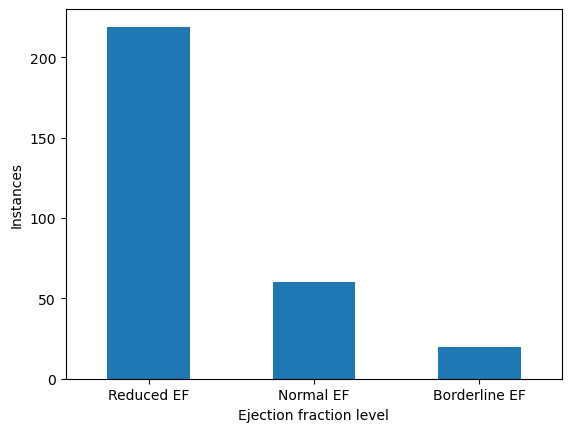

In [125]:
count_classes = pd.value_counts(ds['ejection_fraction'], sort = True)
count_classes.plot(kind = 'bar', rot=0)


plt.xlabel("Ejection fraction level")
plt.ylabel("Instances")

In [ ]:
# Creatinine phosphokinase

Text(0, 0.5, 'Instances')

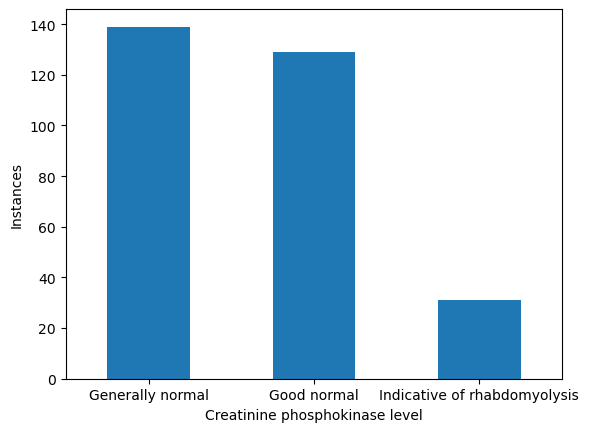

In [127]:
count_classes = pd.value_counts(ds['creatinine_phosphokinase'], sort = True)
count_classes.plot(kind = 'bar', rot=0)


plt.xlabel("Creatinine phosphokinase level")
plt.ylabel("Instances")

In [ ]:
# Serum creatinine

Text(0, 0.5, 'Instances')

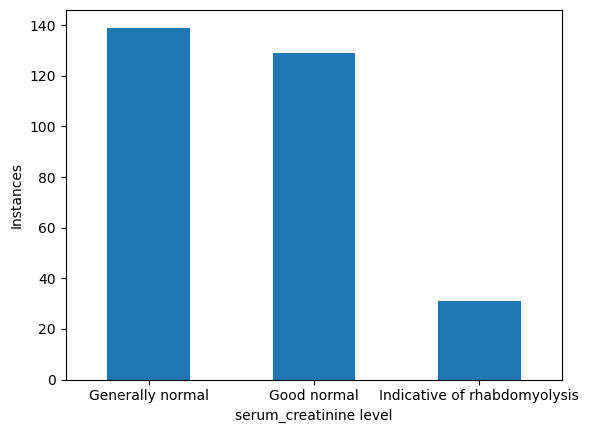

In [128]:
count_classes = pd.value_counts(ds['creatinine_phosphokinase'], sort = True)
count_classes.plot(kind = 'bar', rot=0)


plt.xlabel("serum_creatinine level")
plt.ylabel("Instances")